In [2]:
import pandas as pd

In [3]:
churn_train = pd.read_csv('churn_train.csv')
churn_test = pd.read_csv('churn_test.csv')

In [4]:
churn_train.shape, churn_test.shape

((5634, 22), (1409, 21))

In [5]:
churn_train.head()

,Id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0
3,3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,0
4,4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0


In [6]:
churn_train.set_index('Id', inplace=True)
churn_test.set_index('Id', inplace=True)

In [7]:
churn_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Id,,,,,,,,,,,,,,,,,,,,,
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,0
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0


In [8]:
churn_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [9]:
churn_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [10]:
churn_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [11]:
from pycaret.classification import *
s = setup(churn_train, target = 'Churn', session_id = 123, ignore_features = ['customerID'])

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5634, 21)"
4,Transformed data shape,"(5634, 41)"
5,Transformed train set shape,"(3943, 41)"
6,Transformed test set shape,"(1691, 41)"
7,Ignore features,1
8,Numeric features,4
9,Categorical features,15


In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8009,0.8469,0.5257,0.6573,0.5836,0.4549,0.4602,0.0580
lr,Logistic Regression,0.7999,0.8452,0.5411,0.6484,0.5892,0.4584,0.4622,0.3340
ridge,Ridge Classifier,0.7984,0.8391,0.5104,0.6551,0.5731,0.4438,0.4502,0.0130
lda,Linear Discriminant Analysis,0.7961,0.8390,0.5487,0.6343,0.5878,0.4534,0.4559,0.0130
ada,Ada Boost Classifier,0.7958,0.8397,0.5315,0.6397,0.5798,0.4466,0.4504,0.0240
rf,Random Forest Classifier,0.7880,0.8278,0.4981,0.6263,0.5543,0.4177,0.4227,0.0420
lightgbm,Light Gradient Boosting Machine,0.7865,0.8309,0.5181,0.6173,0.5627,0.4229,0.4262,0.0170
xgboost,Extreme Gradient Boosting,0.7804,0.8199,0.5134,0.6021,0.5538,0.4094,0.4120,0.0210
et,Extra Trees Classifier,0.7679,0.8025,0.4808,0.5742,0.5226,0.3712,0.3741,0.0390
knn,K Neighbors Classifier,0.7570,0.7324,0.4264,0.5562,0.4822,0.3271,0.3324,0.1950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [13]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7747,0.7918,0.3619,0.6333,0.4606,0.3313,0.3521
1,0.7975,0.8736,0.4381,0.6866,0.5349,0.4134,0.4304
2,0.8000,0.8544,0.3714,0.7500,0.4968,0.3893,0.4267
3,0.7868,0.8556,0.3654,0.6786,0.4750,0.3560,0.3829
4,0.7817,0.8346,0.3269,0.6800,0.4416,0.3260,0.3599
5,0.7970,0.8520,0.3654,0.7308,0.4872,0.3777,0.4130
6,0.8046,0.8550,0.3942,0.7455,0.5157,0.4075,0.4400
7,0.8173,0.8740,0.4190,0.8000,0.5500,0.4491,0.4860
8,0.7919,0.8590,0.3810,0.7018,0.4938,0.3770,0.4049


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [15]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7139,0.6229,0.4286,0.4592,0.4433,0.2512,0.2514
1,0.7772,0.7169,0.5905,0.5794,0.5849,0.4327,0.4327
2,0.7468,0.6787,0.5333,0.5234,0.5283,0.3553,0.3553
3,0.7386,0.6581,0.4904,0.5050,0.4976,0.3209,0.3210
4,0.7335,0.6617,0.5096,0.4953,0.5024,0.3204,0.3205
5,0.7538,0.6778,0.5192,0.5347,0.5268,0.3605,0.3606
6,0.7310,0.6424,0.4423,0.4894,0.4646,0.2856,0.2862
7,0.7690,0.7031,0.5619,0.5673,0.5646,0.4074,0.4074
8,0.7157,0.6546,0.5238,0.4701,0.4955,0.2984,0.2993


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7544,0.7774,0.4857,0.5426,0.5126,0.3491,0.3501
1,0.8000,0.8415,0.5714,0.6383,0.6030,0.4699,0.4712
2,0.7924,0.8297,0.4857,0.6456,0.5543,0.4225,0.4298
3,0.7970,0.8364,0.6346,0.6111,0.6226,0.4838,0.4840
4,0.7766,0.8061,0.5096,0.5889,0.5464,0.3993,0.4011
5,0.7792,0.8164,0.5000,0.5977,0.5445,0.4003,0.4031
6,0.7843,0.8253,0.4038,0.6462,0.4970,0.3689,0.3854
7,0.8147,0.8575,0.6000,0.6702,0.6332,0.5097,0.5111
8,0.7944,0.8435,0.6571,0.6053,0.6301,0.4881,0.4889


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
dt, tuned_dt

(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=123, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=6, max_features=1.0, max_leaf_nodes=None,
                        min_impurity_decrease=0.002, min_samples_leaf=5,
                        min_samples_split=5, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=123, splitter='best'))

In [18]:
bagged_dt = ensemble_model(tuned_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7671,0.7888,0.5048,0.5699,0.5354,0.3807,0.3820
1,0.7975,0.8588,0.5238,0.6471,0.5789,0.4476,0.4519
2,0.7823,0.8403,0.4857,0.6145,0.5426,0.4023,0.4070
3,0.7893,0.8421,0.5769,0.6061,0.5911,0.4494,0.4496
4,0.7970,0.8300,0.4904,0.6538,0.5604,0.4319,0.4395
5,0.8071,0.8458,0.5481,0.6628,0.6000,0.4744,0.4781
6,0.8071,0.8458,0.4808,0.6944,0.5682,0.4492,0.4618
7,0.8249,0.8659,0.5810,0.7093,0.6387,0.5247,0.5292
8,0.7970,0.8499,0.5143,0.6506,0.5745,0.4435,0.4488


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [19]:
bagged_dt

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='entropy',
                                                   max_depth=6,
                                                   max_features=1.0,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.002,
                                                   min_samples_leaf=5,
                                                   min_samples_split=5,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [20]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7468,0.7936,0.4476,0.5281,0.4845,0.3183,0.3202
1,0.8101,0.8743,0.6095,0.6531,0.6305,0.5030,0.5035
2,0.8278,0.8459,0.5714,0.7229,0.6383,0.5274,0.5336
3,0.7944,0.8513,0.5481,0.6264,0.5846,0.4488,0.4506
4,0.7919,0.8416,0.4808,0.6410,0.5495,0.4177,0.4250
5,0.8071,0.8458,0.5385,0.6667,0.5957,0.4710,0.4756
6,0.8198,0.8446,0.5481,0.7037,0.6162,0.5008,0.5075
7,0.8325,0.8797,0.6095,0.7191,0.6598,0.5497,0.5530
8,0.7919,0.8445,0.5143,0.6353,0.5684,0.4333,0.4375


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

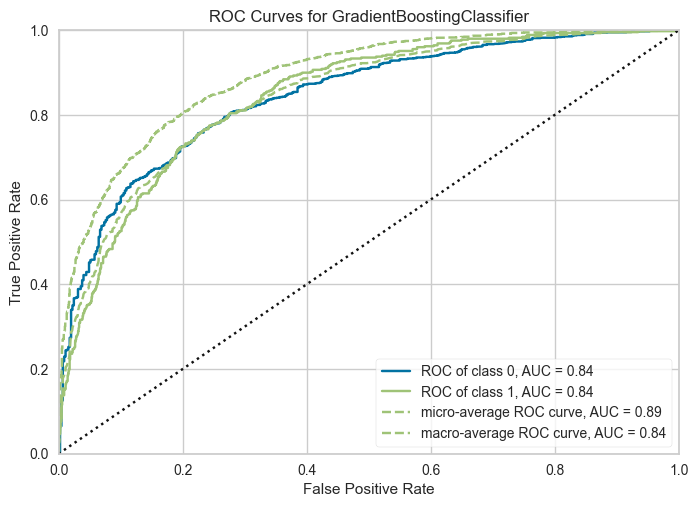

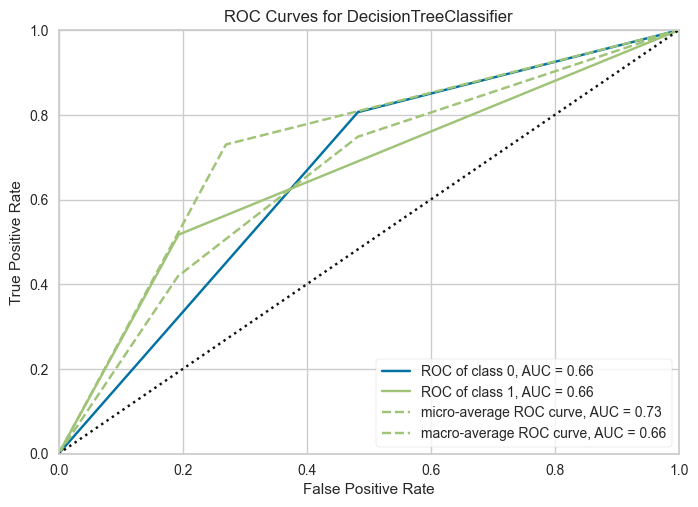

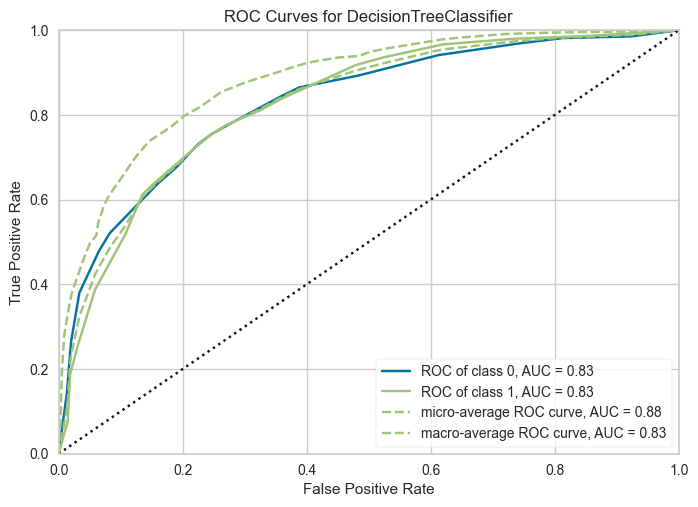

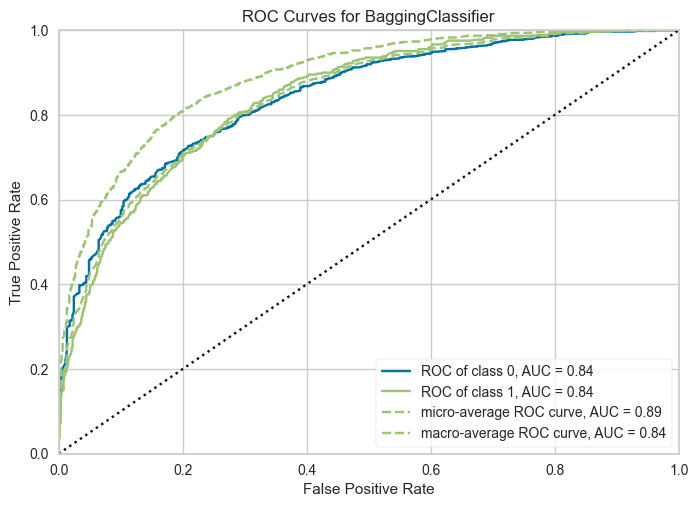

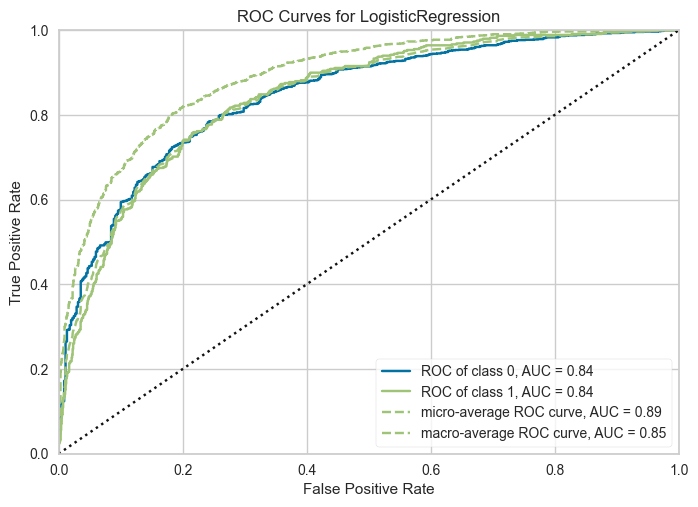

In [21]:
plot_model(best, plot = 'auc')
plot_model(dt, plot = 'auc')
plot_model(tuned_dt, plot = 'auc')
plot_model(bagged_dt, plot = 'auc')
plot_model(lr, plot = 'auc')

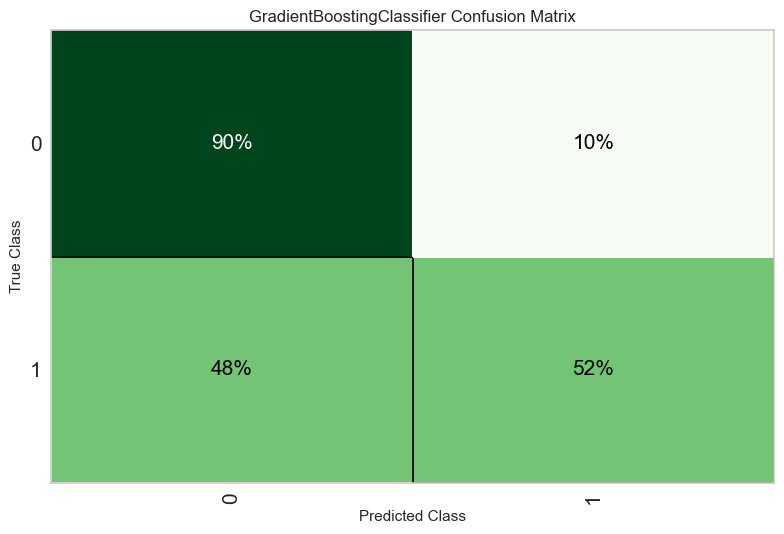

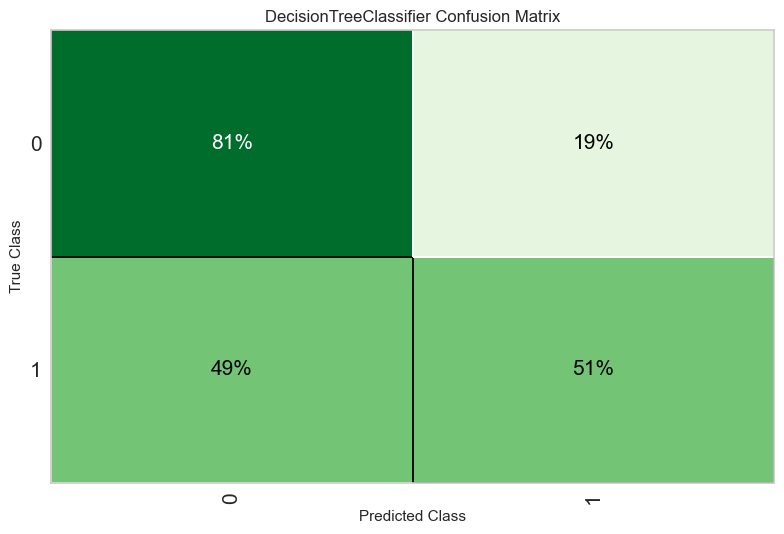

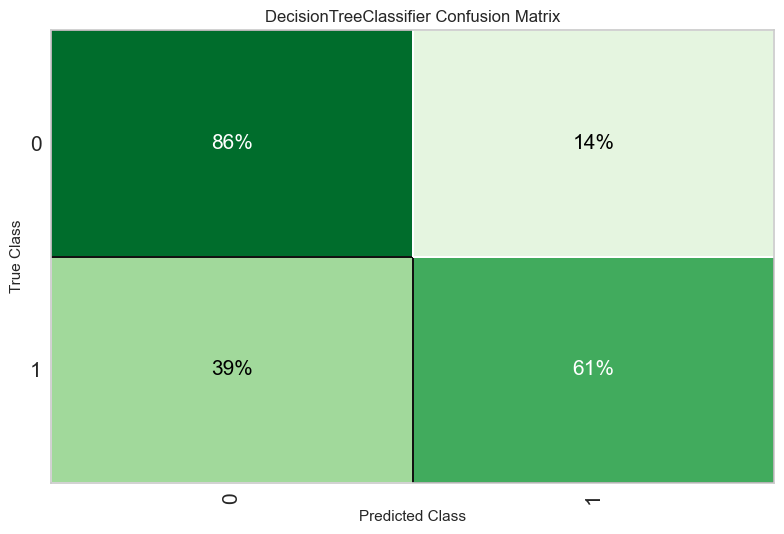

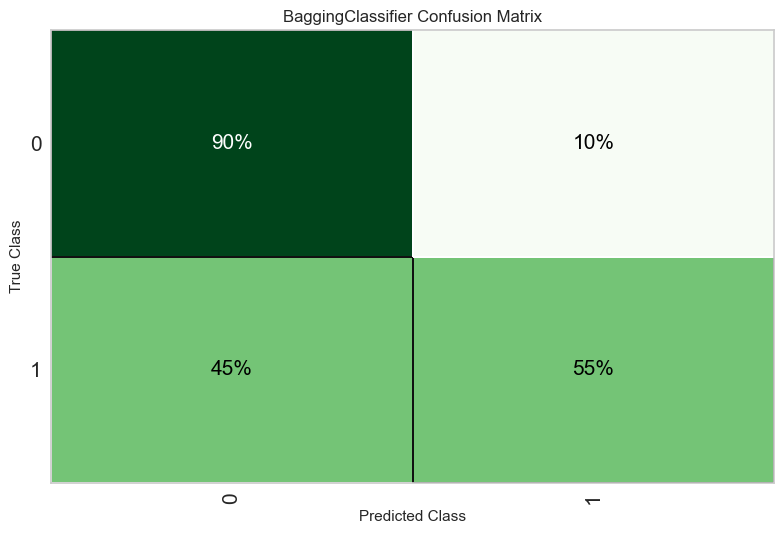

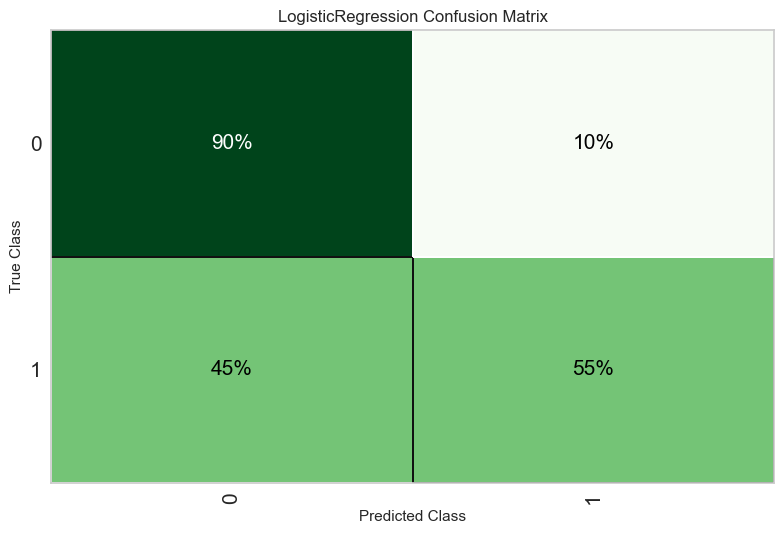

In [22]:
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(dt, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(tuned_dt, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(bagged_dt, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(lr, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

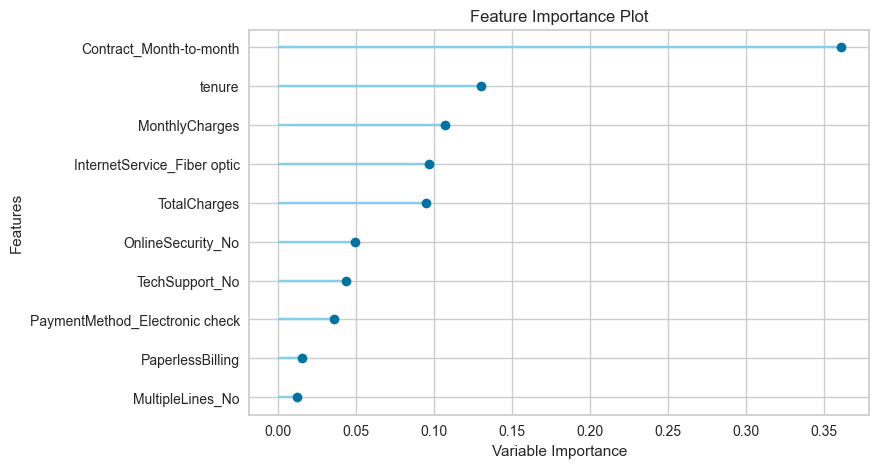

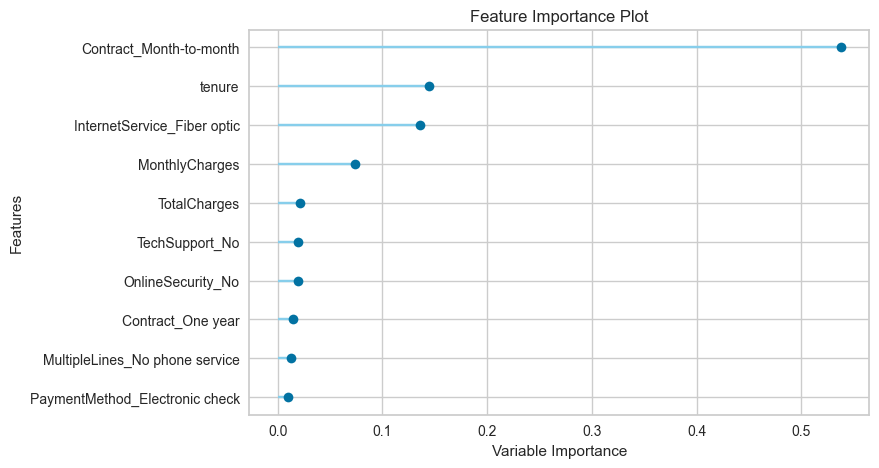

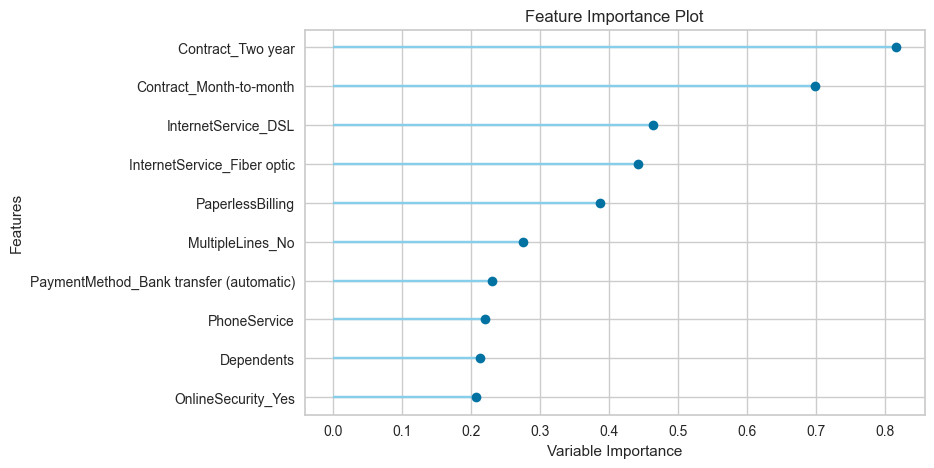

In [23]:
plot_model(best, plot = 'feature')
plot_model(tuned_dt, plot = 'feature')
plot_model(lr, plot = 'feature')

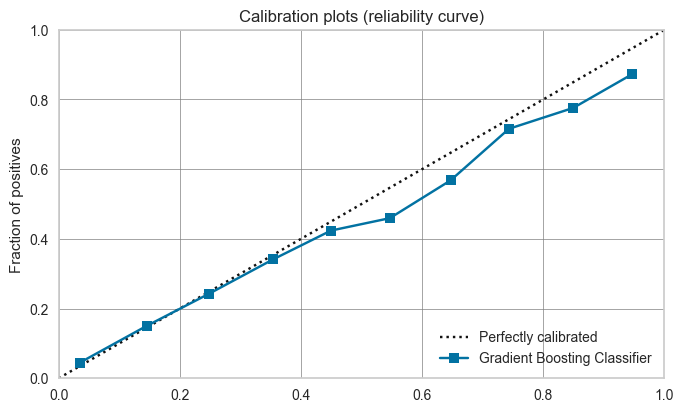

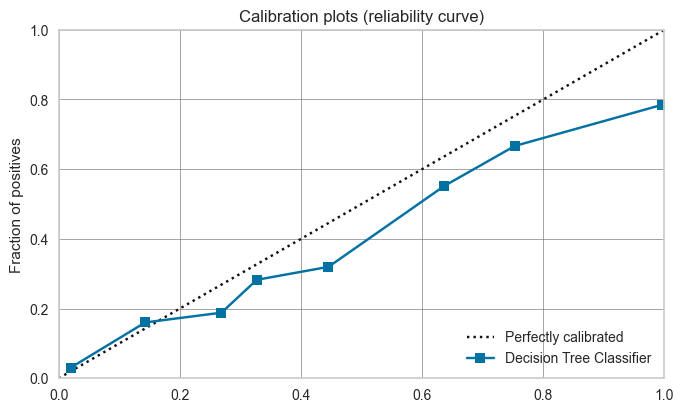

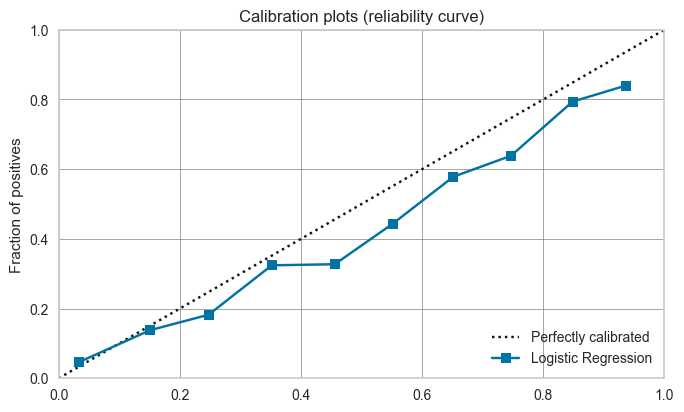

In [24]:
plot_model(best, plot = 'calibration')
plot_model(tuned_dt, plot = 'calibration')
plot_model(lr, plot = 'calibration')

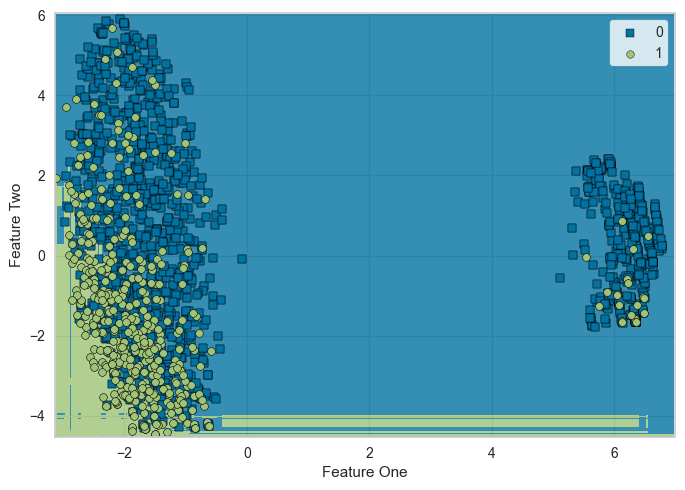

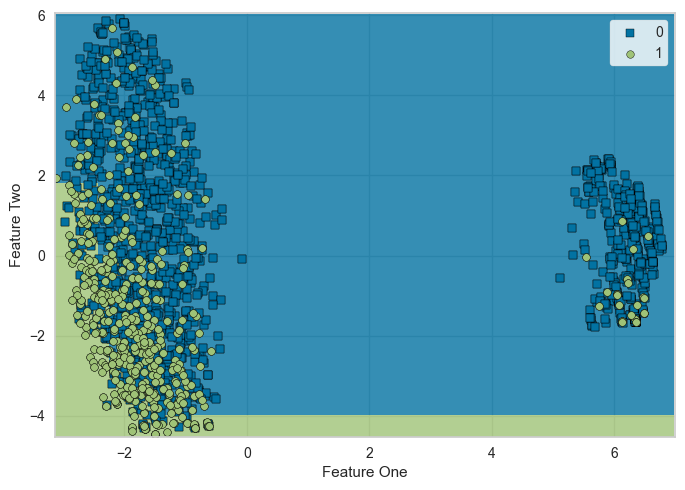

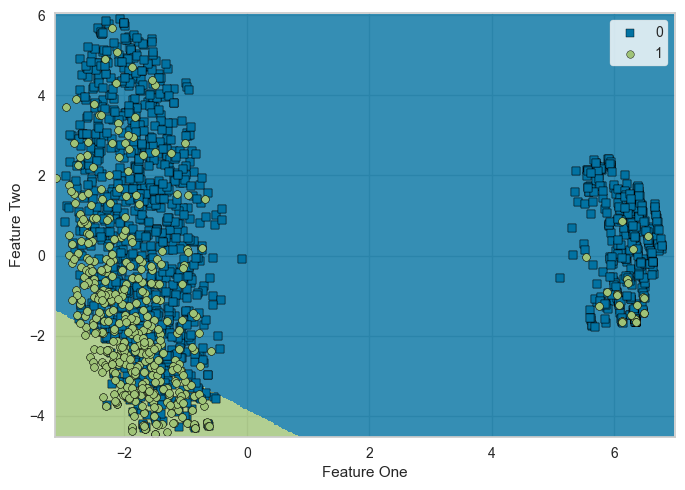

In [25]:
plot_model(best, plot = 'boundary')
plot_model(tuned_dt, plot = 'boundary')
plot_model(lr, plot = 'boundary')

In [26]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
predict_model(best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8025,0.8436,0.5212,0.6629,0.5835,0.4565,0.4622


In [29]:
churn_test_predictions = predict_model(best, churn_test, raw_score=True,)
churn_test_predictions.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,prediction_label,prediction_score_0,prediction_score_1
Id,,,,,,,,,,,,,,,,,,,,,
5634,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),114.050003,8468.200195,0,0.9777,0.0223
5635,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.150002,908.549988,1,0.1772,0.8228
5636,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,...,Yes,No,One year,Yes,Credit card (automatic),78.349998,3211.199951,0,0.9226,0.0774
5637,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,...,No,No,Month-to-month,No,Electronic check,78.199997,1468.750000,0,0.7210,0.2790
5638,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),82.650002,5919.350098,0,0.9687,0.0313


In [30]:
churn_test_predictions.reset_index(inplace=True)
churn_test_predictions = churn_test_predictions[['Id', 'prediction_score_1']].rename(columns={'prediction_score_1': 'Churn'})
churn_test_predictions.head()

,Id,Churn
0,5634,0.0223
1,5635,0.8228
2,5636,0.0774
3,5637,0.2790
4,5638,0.0313


In [31]:
churn_test_predictions.to_csv('churn_predictions.csv', index=False)

# Other Advanced Topics

In [32]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install pycaret[analysis]

zsh:1: no matches found: pycaret[analysis]
Note: you may need to restart the kernel to use updated packages.


In [34]:
import fairlearn
import pycaret

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8025,0.8436,0.5212,0.6629,0.5835,0.4565,0.4622


,Samples,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC,Selection Rate
Contract,,,,,,,,,
Month-to-month,922.0,0.696312,0.683287,0.590909,0.664773,0.625668,0.371678,0.373503,0.381779
One year,340.0,0.882353,0.498339,0.000000,0.000000,0.000000,-0.005768,-0.019550,0.002941
Two year,429.0,0.967366,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


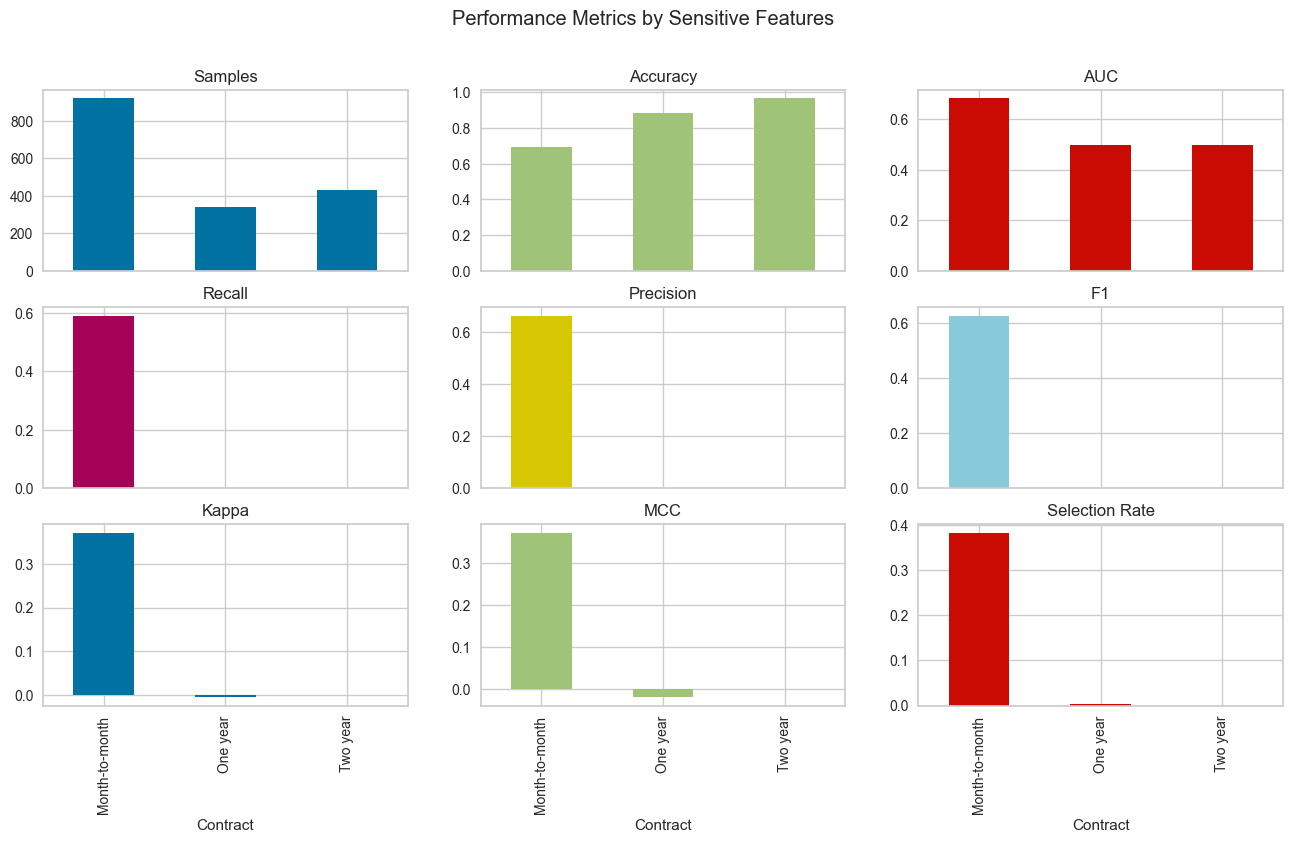

In [35]:
check_fairness(best, sensitive_features=['Contract'])

In [36]:
import numpy as np

# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])

# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(calculate_profit, response_method=...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [37]:
best = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lr,Logistic Regression,0.7999,0.8452,0.5411,0.6484,0.5892,0.4584,0.4622,0.0000,0.0320
knn,K Neighbors Classifier,0.7570,0.7324,0.4264,0.5562,0.4822,0.3271,0.3324,0.0000,0.0160
nb,Naive Bayes,0.6916,0.8219,0.8480,0.4564,0.5932,0.3791,0.4269,0.0000,0.0130
dt,Decision Tree Classifier,0.7408,0.6689,0.5152,0.5115,0.5128,0.3364,0.3367,0.0000,0.0150
svm,SVM - Linear Kernel,0.7055,0.6927,0.4646,0.5543,0.4394,0.2675,0.3077,0.0000,0.0170
ridge,Ridge Classifier,0.7984,0.8391,0.5104,0.6551,0.5731,0.4438,0.4502,0.0000,0.0130
rf,Random Forest Classifier,0.7880,0.8278,0.4981,0.6263,0.5543,0.4177,0.4227,0.0000,0.0400
qda,Quadratic Discriminant Analysis,0.6708,0.8237,0.8671,0.4411,0.5829,0.3569,0.4163,0.0000,0.0130
ada,Ada Boost Classifier,0.7958,0.8397,0.5315,0.6397,0.5798,0.4466,0.4504,0.0000,0.0260
gbc,Gradient Boosting Classifier,0.8009,0.8469,0.5257,0.6573,0.5836,0.4549,0.4602,0.0000,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]